In [7]:
import pint

In [8]:
si = pint.UnitRegistry()

In [9]:
from scipy import constants

temperature = (19 + constants.zero_Celsius) * si.K
pressure = 1000 * si.hPa
R_str = constants.R * si.joule / (si.kelvin * si.mole)
M_dry = 28.966 * si.g / si.mol

In [10]:
density = pressure * M_dry / (R_str * temperature)
density

<Quantity(11.9247271, 'hectopascal * gram / joule')>

In [11]:
density.check("[density]")

True

In [12]:
density.check("[mass]")

False

In [13]:
density.to_base_units()

<Quantity(1.19247271, 'kilogram / meter ** 3')>

In [14]:
f"{density.to_base_units():.3g}"

'1.19 kilogram / meter ** 3'

# Plotting

In [15]:
import numpy as np

def tetens_equation(temperature):
    """Equilibrium vapor pressure"""
    T = temperature
    TC = T - constants.zero_Celsius * si.K
    e_s = 6.11 * np.exp((17.27 * temperature) / (temperature + 237.3 * si.K)) * si.kPa
    return e_s

In [16]:
tetens_equation(100 * si.kelvin)

<Quantity(1022.49186, 'kilopascal')>

In [17]:
from matplotlib import pyplot as plt

In [18]:
si.setup_matplotlib()

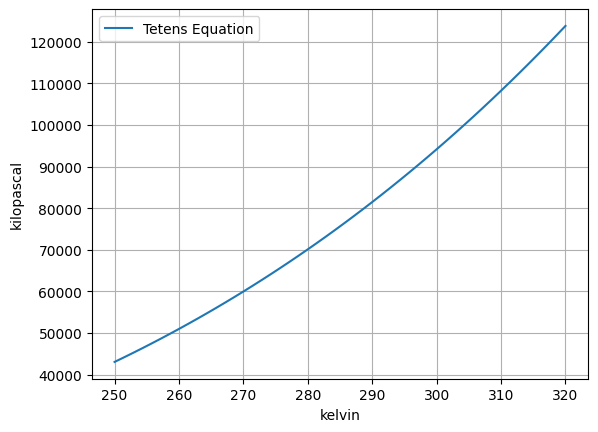

In [19]:
temps = np.linspace(250, 320) * si.K

# Plot using matplotlib with Pint integration.
plt.plot(temps, tetens_equation(temps), label="Tetens Equation")
plt.grid(True)
plt.legend()
plt.show()